In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
air = pd.DataFrame.from_csv('datos/Airplanes.csv')
air = air.reset_index()

In [22]:
temp = pd.DataFrame.from_csv('datos/GlobalTemperatures.csv')
temp = temp.reset_index()

In [23]:
air = (
        air
        .assign(Year = lambda x: x['Date'].dt.year)
        .groupby('Year')
        .size()
        .reset_index(name = 'Accidents')
)
air.head(3)

,Year,Accidents
0,1908,1
1,1912,1
2,1913,3


In [24]:
temp = (
        temp
        .assign(Year = lambda x: x['dt'].dt.year)
        .groupby('Year')['LandAverageTemperature']
        .agg(np.sum)
        .reset_index()
)
temp.head(3)

,Year,LandAverageTemperature
0,1750,95.913
1,1751,55.833
2,1752,34.679


In [25]:
new = air.merge(temp)
new.head(3)

,Year,Accidents,LandAverageTemperature
0,1908,1,98.233
1,1912,1,97.985
2,1913,3,99.573


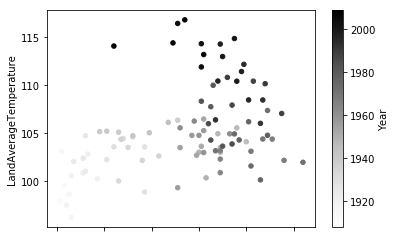

In [28]:
new.plot(x = 'Accidents', y = 'LandAverageTemperature', kind = 'scatter', c = 'Year')
plt.show()

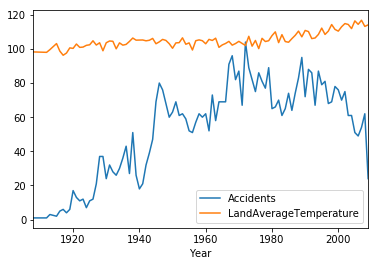

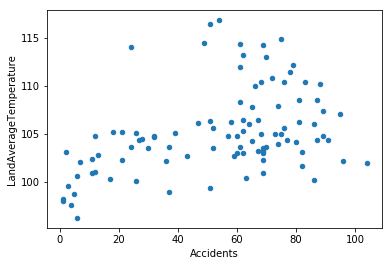

In [38]:
new.plot(x = 'Year')
plt.show()
new.plot(x = 'Accidents', y = 'LandAverageTemperature', kind = 'scatter')
plt.show()

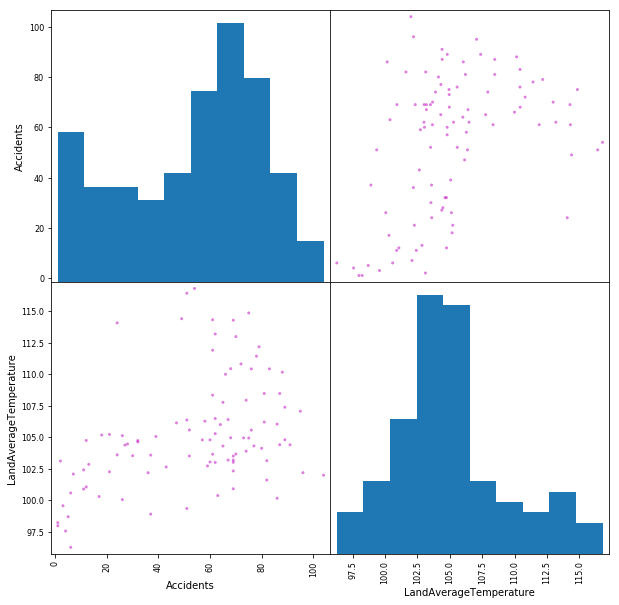

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(new[['Accidents', 'LandAverageTemperature']], figsize = (10,10), c = 'm')
plt.show()

# Tipos de Gráficas

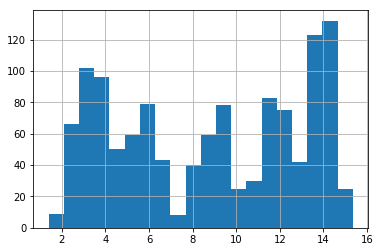

In [60]:
temp['LandAverageTemperature'].hist(bins=20)
plt.show()

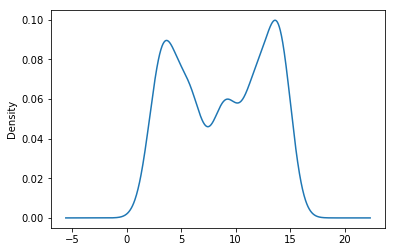

In [61]:
temp['LandAverageTemperature'].plot(kind='density')
plt.show()

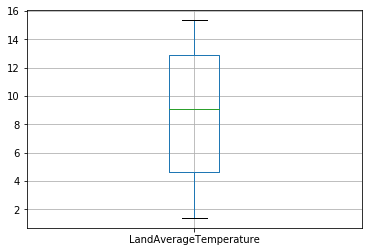

In [67]:
temp[['LandAverageTemperature']].boxplot()
plt.show()